In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import nltk
nltk.download('omw-1.4')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.util import ngrams
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, sent_tokenize
import re,string,unicodedata

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
true_df = pd.read_csv('True.csv')
false_df = pd.read_csv('Fake.csv')
true_df

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


In [22]:
false_df

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [23]:
#Combine the two datasets and insert category festure.

In [24]:
true_df['category']=1
false_df['category']=0
news_df=pd.concat([true_df,false_df])
news_df

,title,text,subject,date,category
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1
...,...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",0
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",0


In [25]:
print(news_df.groupby('subject').describe())

                category                                   
                   count mean  std  min  25%  50%  75%  max
subject                                                    
Government News   1570.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
Middle-east        778.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
News              9050.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
US_News            783.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
left-news         4459.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
politics          6841.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
politicsNews     11272.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0
worldnews        10145.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0


In [26]:
#Check the missing data

In [27]:
empty_fake_index = [index for index, text in enumerate(false_df.text.values) if str(text).strip() =='']
print(f"No of empty rows: {len(empty_fake_index)}")
false_df.iloc[empty_fake_index].tail()

No of empty rows: 630


,title,text,subject,date,category
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015",0
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015",0
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015",0
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015",0
21873,(VIDEO) HYSTERICAL SNL TAKE ON HILLARY’S ANNOU...,,left-news,"Apr 12, 2015",0


In [28]:
true_df['text'] = true_df['title'] + ' ' + true_df['text']
false_df['text'] = false_df['title'] + ' ' + false_df['text']

In [29]:
true_df = true_df.drop(['subject', 'date', 'title'], axis=1)
false_df = false_df.drop(['subject', 'date', 'title'], axis=1)
true_df.head

<bound method NDFrame.head of                                                     text  category
0      As U.S. budget fight looms, Republicans flip t...         1
1      U.S. military to accept transgender recruits o...         1
2      Senior U.S. Republican senator: 'Let Mr. Muell...         1
3      FBI Russia probe helped by Australian diplomat...         1
4      Trump wants Postal Service to charge 'much mor...         1
...                                                  ...       ...
21412  'Fully committed' NATO backs new U.S. approach...         1
21413  LexisNexis withdrew two products from Chinese ...         1
21414  Minsk cultural hub becomes haven from authorit...         1
21415  Vatican upbeat on possibility of Pope Francis ...         1
21416  Indonesia to buy $1.14 billion worth of Russia...         1

[21417 rows x 2 columns]>

In [30]:
# Concatenating the datasets

In [31]:
news3_df = pd.concat([true_df,false_df])
news3_df

,text,category
0,"As U.S. budget fight looms, Republicans flip t...",1
1,U.S. military to accept transgender recruits o...,1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,1
3,FBI Russia probe helped by Australian diplomat...,1
4,Trump wants Postal Service to charge 'much mor...,1
...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,0
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,0
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,0
23479,How to Blow $700 Million: Al Jazeera America F...,0


In [32]:
text_df=news3_df['text']
text_df

0        As U.S. budget fight looms, Republicans flip t...
1        U.S. military to accept transgender recruits o...
2        Senior U.S. Republican senator: 'Let Mr. Muell...
3        FBI Russia probe helped by Australian diplomat...
4        Trump wants Postal Service to charge 'much mor...
                               ...                        
23476    McPain: John McCain Furious That Iran Treated ...
23477    JUSTICE? Yahoo Settles E-mail Privacy Class-ac...
23478    Sunnistan: US and Allied ‘Safe Zone’ Plan to T...
23479    How to Blow $700 Million: Al Jazeera America F...
23480    10 U.S. Navy Sailors Held by Iranian Military ...
Name: text, Length: 44898, dtype: object

In [33]:
# Text cleaning

In [34]:
news3_df['text'] = news3_df['text'].apply((lambda y:re.sub('http://\S+',' ', y)))
news3_df['text'] = news3_df['text'].apply((lambda x:re.sub('\@',' ', x.lower())))
news3_df['text'] = news3_df['text'].apply((lambda z:re.sub(r'[^\w\s]','', z)))
print(news3_df['text'])

0        as us budget fight looms republicans flip thei...
1        us military to accept transgender recruits on ...
2        senior us republican senator let mr mueller do...
3        fbi russia probe helped by australian diplomat...
4        trump wants postal service to charge much more...
                               ...                        
23476    mcpain john mccain furious that iran treated u...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us and allied safe zone plan to take...
23479    how to blow 700 million al jazeera america fin...
23480    10 us navy sailors held by iranian military  s...
Name: text, Length: 44898, dtype: object


In [35]:
tnews = news3_df.head()
fnews = news3_df.tail()

In [36]:
# stop-word removal (is, a, an, the, etc.)

In [37]:
stop = stopwords.words('english')
tnews['text'] = tnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
tnews['text']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16184\206354371.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tnews['text'] = tnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


0    us budget fight looms republicans flip fiscal ...
1    us military accept transgender recruits monday...
2    senior us republican senator let mr mueller jo...
3    fbi russia probe helped australian diplomat ti...
4    trump wants postal service charge much amazon ...
Name: text, dtype: object

In [38]:
stop = stopwords.words('english')
fnews['text'] = fnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))
fnews['text']

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_16184\2353569620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fnews['text'] = fnews['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop]))


23476    mcpain john mccain furious iran treated us sai...
23477    justice yahoo settles email privacy classactio...
23478    sunnistan us allied safe zone plan take territ...
23479    blow 700 million al jazeera america finally ca...
23480    10 us navy sailors held iranian military signs...
Name: text, dtype: object

In [39]:
#tokenization

In [40]:
print(tnews.text.head().apply(word_tokenize))
print(fnews.text.head().apply(word_tokenize))

0    [us, budget, fight, looms, republicans, flip, ...
1    [us, military, accept, transgender, recruits, ...
2    [senior, us, republican, senator, let, mr, mue...
3    [fbi, russia, probe, helped, australian, diplo...
4    [trump, wants, postal, service, charge, much, ...
Name: text, dtype: object
23476    [mcpain, john, mccain, furious, iran, treated,...
23477    [justice, yahoo, settles, email, privacy, clas...
23478    [sunnistan, us, allied, safe, zone, plan, take...
23479    [blow, 700, million, al, jazeera, america, fin...
23480    [10, us, navy, sailors, held, iranian, militar...
Name: text, dtype: object


In [41]:
#creating a wordcloud

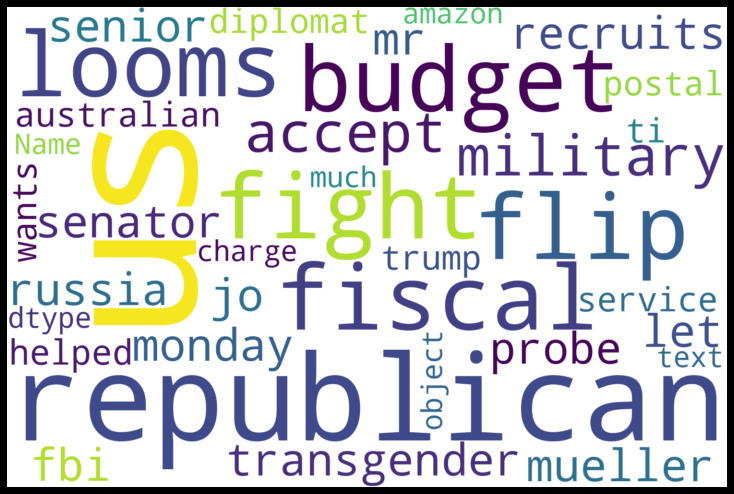

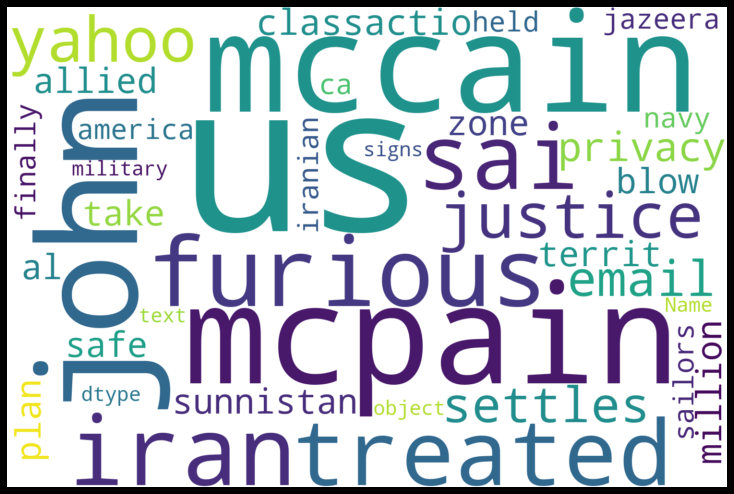

In [43]:
def word_cloud(text):
    wordcloud=WordCloud(
        width = 1500,
        height = 1000,
        background_color = 'white').generate(str(text))
    fig = plt.figure(
        figsize = (10, 10),
        facecolor = 'k',
        edgecolor = 'k')
    plt.imshow(wordcloud, interpolation = 'bilinear')
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()
word_cloud(tnews.text)
word_cloud(fnews.text)

In [44]:
#Lemmatization

In [50]:
def basic_clean(text):
    wnl = nltk.stem.WordNetLemmatizer()
    stopwords = nltk.corpus.stopwords.words('english')
    words = re.sub(r'[^\w\s]', '', text).split()
    return [wnl.lemmatize(word,pos="v") for word in words if word not in stopwords]

In [58]:
true_word = basic_clean(''.join(str(tnews['text'].tolist())))
print(true_word[:50])

['us', 'budget', 'fight', 'loom', 'republicans', 'flip', 'fiscal', 'script', 'washington', 'reuters', 'head', 'conservative', 'republican', 'faction', 'us', 'congress', 'vote', 'month', 'huge', 'expansion', 'national', 'debt', 'pay', 'tax', 'cut', 'call', 'fiscal', 'conservative', 'sunday', 'urge', 'budget', 'restraint', '2018', 'keep', 'sharp', 'pivot', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speak', 'cbs', 'face', 'nation', 'draw', 'hard', 'line']


In [79]:
fake_word = basic_clean(''.join(str(fnews['text'].tolist())))
print(fake_word[:50])

['mcpain', 'john', 'mccain', 'furious', 'iran', 'treat', 'us', 'sailors', 'well', '21st', 'century', 'wire', 'say', '21wire', 'report', 'earlier', 'week', 'unlikely', 'mishap', 'two', 'us', 'naval', 'vessels', 'stray', 'iranian', 'water', 'hours', 'president', 'state', 'union', 'speech', 'follow', 'usual', 'parade', 'archneocons', 'come', 'tv', 'real', 'time', 'declare', 'incident', 'act', 'aggression', 'iran', 'unite', 'state', 'mere', 'coincidence24', 'hours', 'incident']


In [59]:
#Histograms of lemmarized words

In [75]:
tword_freq=pd.value_counts(np.array(true_word))[:20]
tword_freq

trump             49
say               42
service           23
postal            18
us                17
transgender       16
amazon            14
administration    13
house             13
package           12
campaign          12
president         12
republican        12
would             12
federal           11
investigation     11
russia            11
percent           11
time              11
republicans       10
dtype: int64

In [80]:
fword_freq=pd.value_counts(np.array(fake_word))[:20]
fword_freq

us            54
syria         53
turkey        23
state         23
isis          22
would         21
iranian       21
military      20
al            20
washington    20
iran          20
one           18
new           18
say           16
iraq          16
train         16
media         15
plan          15
zone          14
safe          14
dtype: int64

Text(0.5, 0, '# of Occurances')

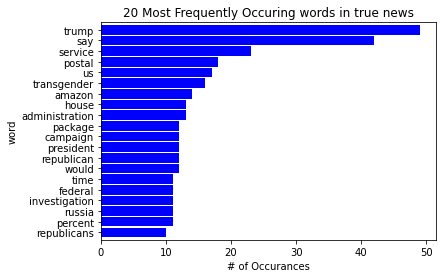

In [76]:
tword_freq.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring words in true news')
plt.ylabel('word')
plt.xlabel('# of Occurances')

Text(0.5, 0, '# of Occurances')

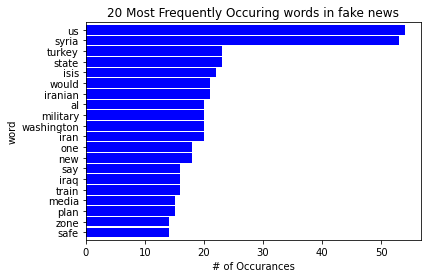

In [82]:
fword_freq.sort_values().plot.barh(color='blue', width=.9, figsize=(6, 4))
plt.title('20 Most Frequently Occuring words in fake news')
plt.ylabel('word')
plt.xlabel('# of Occurances')

### Conclusion

After cleaning the data we can have some insights from the datasets. This code serves to obtain some keywords of true and fake news and show how NLP techniques can reach interesting insights from them.